# FORESEE Model: Inelastic Dark Matter [1810.01879](https://arxiv.org/pdf/1810.01879.pdf)

## Load Libraries 

In [1]:
import sys, os
import random, math
src_path = "../../"
sys.path.append(src_path)

import numpy as np
from src.foresee import Foresee, Utility, Model
from matplotlib import pyplot as plt

/Users/abraham/Documents/GitHub/FORESEE/Models/iDM/../../src/foresee.py:1462: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def boostlist(arr_particle, arr_boost):


In [2]:
%load_ext autoreload
%autoreload 2

## Specifying the Model

The models consists of a dark photon ($A'$) with mass $m_{A'}$, and two nearly degenerate states in the dark sector ($\chi_1,~\chi_2$), with $m_2>m_1$ and $\Delta=\frac{m_2-m_1}{m_1}$. The dark photon - dark sector interaction has an off-diagonal coupling and the dark photon is as usual. We have,


\begin{equation}
\mathcal{L} = \left(i\epsilon_D A'_{\mu}\bar{\chi_2}\gamma^{\mu}\chi_1 + h.c\right) + \frac{1}{2} m_{A'}^2 A'^2  - \epsilon e \sum \bar f \gamma^\mu f A'_\mu.
\end{equation}

We set $\alpha_D = \epsilon_D^2/(4\pi)$ large so that BR($A'\rightarrow \chi_1 \chi_2) \approx 1$.

In [3]:
energy = "13.6"
modelname="iDM"
model = Model(modelname, path="./")

alphaD=0.1
delta=0.1
mA_mChi1=5

**$\chi_2$ decay:** $\chi_2$ decays to pair of DM fermions via an off-shell A'

The expression for decay width is given by Eq. 13 in [1810.01879](https://arxiv.org/pdf/1810.01879.pdf)

\begin{equation}
\Gamma (\chi_2 \rightarrow \chi_1 l^+ l^-) = \frac{4\epsilon^2\alpha_{EM}\alpha_{D}}{15\pi}\frac{\Delta^5m_1^5}{m^4_{A'}}.
\end{equation}

In [4]:
# The lifetime of chi2 depends on alphaD, delta=0.05, mA/mChi1 ratio. So read in the ctau file for the required values.

filename = "model/ctau_delta_"+str(delta)+"_mA_mChi1_"+str(mA_mChi1)+"_alphaD_"+str(alphaD)+".txt"
model.set_ctau_1d(
    filename=filename, 
)

# the br to different final states are not differentiated here. So the br to "all" is set to 1 now.
decay_modes = ["all_delta_"+str(delta)+"_mA_mChi1_"+str(mA_mChi1)+"_alphaD_"+str(alphaD)] 
model.set_br_1d(
    modes = decay_modes,
    finalstates=[None],
    filenames=["model/br/"+mode+".txt" for mode in decay_modes],
)

### We also need to specify the production modes from which A' was obtained

In [5]:
model.add_production_2bodydecay(
    pid0 = "111",
    pid1 = "22",
    br = "2.*0.99 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),3)",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    # generator = ['Pythia8-Forward'],
    energy = energy,
    nsample = 100,
)

model.add_production_2bodydecay(
    pid0 = "221",
    pid1 = "22",
    br = "2.*0.39 * coupling**2 * pow(1.-pow(mass/self.masses('pid0'),2),3)",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    # generator = ['Pythia8-Forward'],
    energy = energy,
    nsample = 100, 
)

model.add_production_mixing(
    pid = "113",
    mixing = "coupling * 0.3/5. * self.masses('pid')**2/abs(mass**2-self.masses('pid')**2+self.masses('pid')*self.widths('pid')*1j)",
    generator = ['EPOSLHC', 'SIBYLL', 'QGSJET', 'Pythia8-Forward'],
    # generator = ['Pythia8-Forward'],
    energy = energy,
)

masses_brem = [ 
    0.01  ,  0.0126,  0.0158,  0.02  ,  0.0251,  0.0316,  0.0398,
    0.0501,  0.0631,  0.0794,  0.1   ,  0.1122,  0.1259,  0.1413,
    0.1585,  0.1778,  0.1995,  0.2239,  0.2512,  0.2818,  0.3162,
    0.3548,  0.3981,  0.4467,  0.5012,  0.5623,  0.6026,  0.631 ,
    0.6457,  0.6607,  0.6761,  0.6918,  0.7079,  0.7244,  0.7413,
    0.7586,  0.7762,  0.7943,  0.8128,  0.8318,  0.8511,  0.871 ,
    0.8913,  0.912 ,  0.9333,  0.955 ,  0.9772,  1.    ,  1.122 ,
    1.2589,  1.4125,  1.5849,  1.7783,  1.9953,  2.2387,  2.5119,
    2.8184,  3.1623,  3.9811,  5.0119,  6.3096,  7.9433, 10.    
]

model.add_production_direct(
    label = "Brem",
    energy = energy,
    condition = ["p.pt<1", "p.pt<2", "p.pt<0.5", "p.pt<1"],
    # condition = ["p.pt<1"],
    coupling_ref=1,
    masses = masses_brem,
)

#masses_dy = [1.5849, 1.7783, 1.9953,2.2387, 2.5119, 2.8184, 3.1623, 3.9811, 5.0119, 6.3096, 7.9433, 10.]
#model.add_production_direct(
#    label = "DY",
#    energy = energy,
#    coupling_ref=1,
#    masses = masses_dy,
#    condition='True',
#)


## Initialize FORESEE

In [6]:
foresee = Foresee(path=src_path)
foresee.set_model(model=model)

## $\chi_2$ spectrum from $A' \rightarrow \chi_1 \chi_2$

A' decays to $\chi_2,\chi_1$ with a BR $\approx1$ since we chose large values for $\alpha_D$. This two body decay is implementednin $\texttt{FORESEE}$ as $\texttt{twobody\_decay()}$.

Below we write a function to take the A' spectrum from different production modes and decay into $\chi_2,~\chi_1$

In [7]:
def get_chi_spectrum(setupnames, modes, mA_mChi1=3, delta=0.1, energy="13.6", 
                     channels=None, nsample=100, do_plot=False):

    # Get the production channels for A'
    channels = [key for key in modes.keys()]  
    for channel in channels:
        print ('channel', channel)
        for value in modes[channel]:
            print ('value', value)  
            # Get dark photon mass
            for mass in masses:
                print ('mass', mass)
                filenamein = "model/LLP_spectra/"+energy+"TeV_"+channel+"_"+value+"_m_"+str(mass)+".npy" 
                # print (filenamein)
                if os.path.isfile(filenamein):
                    pass
                else:
                    print ('file not found, continuing to next channel')
                    continue
                ps,ws = foresee.convert_list_to_momenta(filenamein,mass=mass,filetype="npy",nsample=nsample)
    
                # two body decay A' > chi1 chi2 . chi2 is the LLP that decays in FASER.
                m0 = mass
                m1 = m0/mA_mChi1
                m2 = m1*(1+delta)
                br = 1 # We chose large alpha_D to get BR to chi1 chi2 ~ 1.
                momenta, weights = [], []
                
                for p,w in zip(ps,ws):
                    w=w[0]
                    phi = random.uniform(-math.pi,math.pi)
                    cos = random.uniform(-1.,1.)
                    p1, p2 = foresee.twobody_decay(p,m0,m1,m2,phi,cos)
                    momenta.append(p2)
                    weights.append(w*br)
        
                #plot

                filenameout = "model/LLP_spectra/"+energy+"TeV_"+channel+"_"+value+"_delta_"+str(delta)+"_mA_mChi1_"+str(mA_mChi1)+"_m_"+str(mass)
                print (filenameout)
                foresee.convert_to_hist_list(momenta,weights, filename=filenameout, do_plot=do_plot)
        

In [8]:
masses=[round(x,5) for x in np.logspace(-2,0.2,22+1)]
couplings = np.logspace(-5,0,201) 

In [9]:
%%time

# setupnames = ['EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5', 'PYTHIA_pT=1']
# modes = {'111':  ['EPOSLHC', 'SIBYLL', 'QGSJET'  , 'Pythia8-Forward'], 
#          '221':  ['EPOSLHC', 'SIBYLL', 'QGSJET'  , 'Pythia8-Forward'], 
#          '113':  ['EPOSLHC', 'SIBYLL', 'QGSJET'  , 'Pythia8-Forward'], 
#          "Brem": ["p.pt<1" , "p.pt<2", "p.pt<0.5", "p.pt<1"         ]}

setupnames = ['EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5', 'PYTHIA_pT=1']
modes = {
        '111':  ['EPOSLHC', 'SIBYLL', 'QGSJET'  , 'Pythia8-Forward'], 
         '221':  ['EPOSLHC', 'SIBYLL', 'QGSJET'  , 'Pythia8-Forward'], 
         '113':  ['EPOSLHC', 'SIBYLL' , 'Pythia8-Forward'], 
         "Brem": ["p.pt<1" , "p.pt<2", "p.pt<0.5", "p.pt<1"]
}

get_chi_spectrum(setupnames, modes, mA_mChi1=mA_mChi1, delta=delta, energy="13.6", nsample=1)

channel 111
value EPOSLHC
mass 0.01
model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01
save data to file: model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01
mass 0.01259
model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01259
save data to file: model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01259
mass 0.01585
model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01585
save data to file: model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01585
mass 0.01995
model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01995
save data to file: model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.01995
mass 0.02512
model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.02512
save data to file: model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.02512
mass 0.03162
model/LLP_spectra/13.6TeV_111_EPOSLHC_delta_0.1_mA_mChi1_5_m_0.03162
save data to file: model/LLP_spectra/13.6TeV_111_EP

## Event Generation

In the following, we want to study one specific benchmark point with $m_{A'}=0.1$ GeV, $\epsilon=1\cdot 10^{-2}$, $\Delta=0.1$, and $m_{A'}/m_{\chi_1}=3$.

Export events as a HEPMC file. 

In [10]:
mass, coupling, = 0.1, 1e-3

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER.

In [11]:
foresee.set_detector(
    distance=480, 
    selection="np.sqrt((x.x)**2 + (x.y)**2)<0.1",    
    length=1.5, 
    luminosity=180, 
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [12]:
%%time

setupnames = ['EPOSLHC_pT=1', 'SIBYLL_pT=2', 'QGSJET_pT=0.5', 'PYTHIA_pT=1']
modes = {'111':  ['EPOSLHC', 'SIBYLL', 'QGSJET'  , 'Pythia8-Forward'], 
         '221':  ['EPOSLHC', 'SIBYLL', 'QGSJET'  , 'Pythia8-Forward'], 
         '113':  ['EPOSLHC', 'SIBYLL' , 'Pythia8-Forward'],          
         "Brem": ["p.pt<1" , "p.pt<2", "p.pt<0.5", "p.pt<1"         ]}

# setupnames = ['PYTHIA_pT=1']
# modes = {
#     '111':  ['Pythia8-Forward'], 
#          '221':  ['Pythia8-Forward'], 
#          '113':  ['Pythia8-Forward'],
#          "Brem": ["p.pt<1"         ]}

momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    weightnames=setupnames,
    modes=modes,
    delta=delta,
    mA_mChi1=mA_mChi1,
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))

Expected number of events for EPOSLHC_pT=1: 125.825
Expected number of events for SIBYLL_pT=2: 30.384
Expected number of events for QGSJET_pT=0.5: 31.095
Expected number of events for PYTHIA_pT=1: 36.061
CPU times: user 498 ms, sys: 5.15 ms, total: 504 ms
Wall time: 511 ms


Let us plot the resulting energy distribution

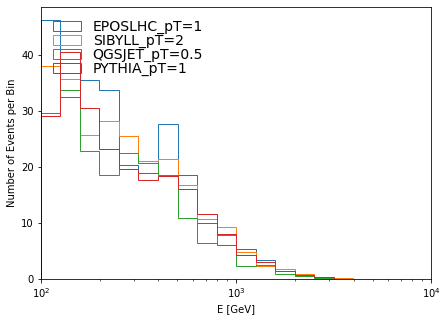

In [16]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper left')
# plt.savefig("E_distribution_"+modelname+".pdf")
plt.show()

## Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. The $\chi_2$ flux for a list of masses were already generated above.

We first plot the production rate of $\chi_2$

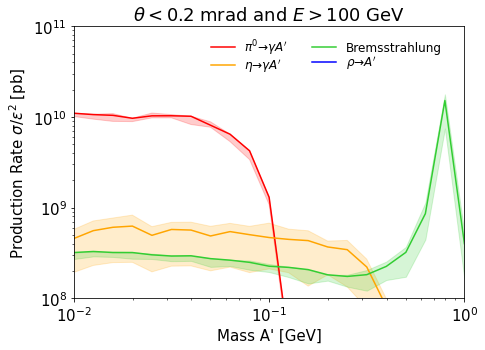

CPU times: user 23.1 s, sys: 91.6 ms, total: 23.2 s
Wall time: 22.9 s


In [22]:
%%time

masses=[round(x,5) for x in np.logspace(-2,0.2,22+1)]
couplings = np.logspace(-5,0,201) 

productions=[
    {"channels": ["111"] , "color": "red"      , "label": r"$\pi^0 \to \gamma A'$", "generators": ["EPOSLHC","QGSJET","SIBYLL","Pythia8-Forward"]  },
    {"channels": ["221"] , "color": "orange"   , "label": r"$\eta \to \gamma A'$" , "generators": ["EPOSLHC","QGSJET","SIBYLL","Pythia8-Forward"]  },
    {"channels": ["Brem"], "color": "limegreen", "label": r"Bremsstrahlung"       , "generators": ["p.pt<1" ,"p.pt<2","p.pt<0.5","p.pt<1"]},
    {"channels": ["113"] , "color": "blue"     , "label": r"$\rho \to A'$"        , "generators": ["EPOSLHC","SIBYLL","Pythia8-Forward"]  },
]

# productions=[
#     {"channels": ["111"] , "color": "red"      , "label": r"$\pi^0 \to \gamma A'$", "generators": ["Pythia8-Forward"]  },
#     {"channels": ["221"] , "color": "orange"      , "label": r"$\eta \to \gamma A'$", "generators": ["Pythia8-Forward"]  },
#     {"channels": ["113"] , "color": "blue"      , "label": r"$\rho \to A'$", "generators": ["Pythia8-Forward"]  },
#     {"channels": ["Brem"], "color": "limegreen", "label": r"Bremsstrahlung"       , "generators": ["p.pt<1"]},

# ]

plot=foresee.plot_production(
    masses = masses,
    productions = productions,
    energy=energy,
    condition="logth<-3.7 and logp>2",  
    xlims=[0.01,1.0],ylims=[1e8,1e11],
    xlabel=r"Mass A' [GeV]",
    ylabel=r"Production Rate $\sigma/\epsilon^2$ [pb]",
    title=r"$\theta < 0.2$ mrad and $E > 100$ GeV",
    legendloc=(0.97,1),
    fs_label=12,
    ncol=2,
    delta=delta,
    mA_mChi1=mA_mChi1,    
)

# plot.savefig("photon_production_channels_E100.pdf")
plot.show()

Let us now scan over various masses and couplings, and record the resulting number of evets. Note that here we again consider the FASER configuration, which we set up before.

In [13]:
%%time

#get reach  
list_nevents = {label:[] for label in setupnames}
for mass in masses:
    couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings,modes=modes,
                                                      delta=delta, mA_mChi1=mA_mChi1)
    for i,label in enumerate(setupnames): list_nevents[label].append(nevents.T[i])  
        
#save results
configuration="delta_"+str(delta)+"_mA_mChi1_"+str(mA_mChi1)

print (delta)

for label in setupnames: 
    result = np.array([masses,couplings,list_nevents[label]], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)

0.1
CPU times: user 7.33 s, sys: 116 ms, total: 7.45 s
Wall time: 7.58 s


We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [20]:
setups = [ 
    ["13.6TeV_delta_0.1_mA_mChi1_3_EPOSLHC_pT=1.npy",  r"$\Delta$=0.1, $m_{A'}/m_{1}=3$"    , "red"        ,  "solid"  , 0., 3],
    ["13.6TeV_delta_0.1_mA_mChi1_3_PYTHIA_pT=1.npy",  ""    , "red"        ,  "dashed"  , 0., 3],
    ["13.6TeV_delta_0.1_mA_mChi1_3_QGSJET_pT=0.5.npy",  ""    , "red"        ,  "dotted"  , 0., 3],
    ["13.6TeV_delta_0.1_mA_mChi1_3_SIBYLL_pT=2.npy",  ""    , "red"        ,  "dashdot"  , 0., 3],

    ["13.6TeV_delta_0.05_mA_mChi1_3_EPOSLHC_pT=1.npy",  r"$\Delta$=0.05, $m_{A'}/m_{1}=3$"    , "blue"        ,  "solid"  , 0., 3],
    ["13.6TeV_delta_0.05_mA_mChi1_3_PYTHIA_pT=1.npy",  ""    , "blue"        ,  "dashed"  , 0., 3],
    ["13.6TeV_delta_0.05_mA_mChi1_3_QGSJET_pT=0.5.npy",  ""    , "blue"        ,  "dotted"  , 0., 3],
    ["13.6TeV_delta_0.05_mA_mChi1_3_SIBYLL_pT=2.npy",  ""    , "blue"        ,  "dashdot"  , 0., 3],

    ["13.6TeV_delta_0.1_mA_mChi1_5_EPOSLHC_pT=1.npy",  r"$\Delta$=0.1, $m_{A'}/m_{1}=5$"    , "green"        ,  "solid"  , 0., 3],
    ["13.6TeV_delta_0.1_mA_mChi1_5_PYTHIA_pT=1.npy",  ""    , "green"        ,  "dashed"  , 0., 3],
    ["13.6TeV_delta_0.1_mA_mChi1_5_QGSJET_pT=0.5.npy",  ""    , "green"        ,  "dotted"  , 0., 3],
    ["13.6TeV_delta_0.1_mA_mChi1_5_SIBYLL_pT=2.npy",  ""    , "green"        ,  "dashdot"  , 0., 3],  

    ["13.6TeV_delta_0.05_mA_mChi1_5_EPOSLHC_pT=1.npy",  r"$\Delta$=0.05, $m_{A'}/m_{1}=5$"    , "pink"        ,  "solid"  , 0., 3],
    ["13.6TeV_delta_0.05_mA_mChi1_5_PYTHIA_pT=1.npy",  ""    , "pink"        ,  "dashed"  , 0., 3],
    ["13.6TeV_delta_0.05_mA_mChi1_5_QGSJET_pT=0.5.npy",  ""    , "pink"        ,  "dotted"  , 0., 3],
    ["13.6TeV_delta_0.05_mA_mChi1_5_SIBYLL_pT=2.npy",  ""    , "pink"        ,  "dashdot"  , 0., 3],    
]

Then we specify all the existing bounds, separating the bounds obtained by experimental collaborations and theory recasts.

In [21]:
bounds = [   
    ["bounds_BaBaR.txt"     , "BaBaR"        ,  9.5e-1, 1.7e-2, 0  ],
    # ["bounds_LEP.txt"       , "LEP"          ,  6.1e+1, 7.0e-2, 0  ],
]

We then specify other projected sensitivitities (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [22]:
projections = [
    ["limits_SeaQuest.txt"         , "orchid"       , "SeaQuest"         , 2.2e+0, 3.0e-2, 0  ],
    ["limits_Belle2.txt"           , "purple"       , "Belle 2"          , 1.5e+0, 4.6e-5, 0  ],
    ["limits_Codex_b_2.txt"        , "turquoise"    , ""                 , 2.0e+1, 1.3e-4, 0  ],
    ["limits_Codex_b.txt"          , "turquoise"    , "Codex-B"          , 1.4e+1, 3.0e-4, 0  ],
    ["limits_LHCb.txt"             , "blue"         , "LHCb"             , 6.6e+0, 1.0e-2, -33],
    ["limits_LHCDMJ.txt"           , "cyan"         , " LHC\n(DMJ)"      , 6.0e+1, 3.3e-3, 0  ],
    ["limits_LHCtiming.txt"        , "deepskyblue"  , "   LHC\n(timing)" , 5.0e+1, 1.0e-3, 0  ],
    ["limits_MATHUSLA.txt"         , "teal"         , "MATHUSLA"         , 1.1e+1, 5.5e-5, 0  ],
]

Finally, we can plot everything using `foresee.plot_reach()`.

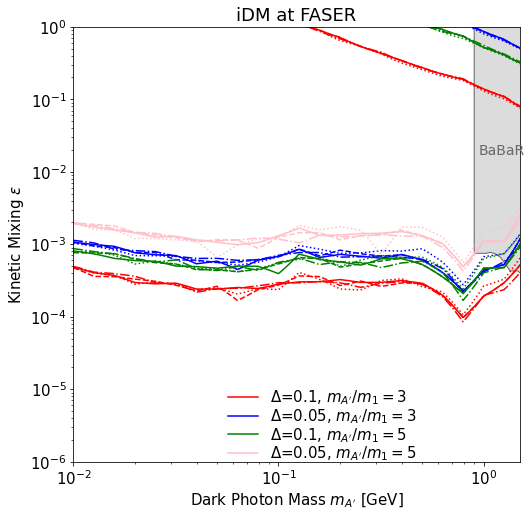

In [26]:
plt = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    bounds2=[],
    projections=[],
    branchings=None,
    title="iDM at FASER", 
    xlims = [0.01,1.5], 
    ylims=[1e-6,1e0],
    xlabel=r"Dark Photon Mass $m_{A'}$ [GeV]", 
    ylabel=r"Kinetic Mixing $\epsilon$",
    legendloc=(0.8,0.2),
    figsize=(8,8),
)


# plt.text(0.011, 2.15*10**-5, r"$m_\chi\!=\!0.6 m_{A'}$",fontsize=13,color="k",rotation=25)
# plt.text(0.013, 1.20*10**-5, r"$\alpha_D\!=\!0.1$",fontsize=13,color="k",rotation=25)

# plt.subplots_adjust(left=0.12, right=0.97, bottom=0.10, top=0.95)
# plt.savefig("Reach_"+modelname+".pdf")
plt.show()